# **How to use this notebook?**

---


### **Structure of a notebook**

<font size = 4>The notebook consists of two types of cells: text cells and code cells. 

<font size = 4>**Text cells** provide information and can be modified by double-clicking them. You are currently reading the text cell. You can create a new text cell by clicking the "+ Text" button, and a new code cell by clicking the "+ Code" button.

<font size = 4>**Code cells** contain executable code and can be modified by selecting them. To execute a code cell, click on the play button (`[ ]`) on the left side of the cell. 

<font size = 4>**Remember to click to execute the cell by clicking the play button on the left side of each cell. Once execution is done the animation of play button stops. It is only after cell execution that you can see the changes that you have made.**

---
### **Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = It provides a structured overview of the notebook's contents. You can click on the sections to quickly navigate through the notebook.

<font size = 4>*Code snippets* = This tab contains examples of coding tasks. You can disregard this section if you're using this notebook for your own purposes.

<font size = 4>*Files* = This tab displays all the available files. Once you have mounted your Google Drive (see section 1), your files and folders will be accessible here.

<font size = 4>**Please note that any uploaded files will be purged when the runtime changes, while files saved in Google Drive will remain intact. You don't need to use the "Mount Drive" button as your Google Drive is already connected in section 1.2.**

<font size = 4>**Note:** The "sample data" folder under "Files" contains default Google Colab files. Please refrain from uploading anything to this folder.

---
### **Making changes to the notebook**

<font size = 4>If you wish to make changes to the notebook, you can create a copy and save it to your Google Drive by selecting **"File" -> "Save a copy in Drive"**.

<font size = 4>To edit a cell, double click on it. This will show you either the source code (in code cells) or the source text (in text cells).

In code cells, you can use the **`#`** symbol to comment out parts of the code, preserving the original code as a comment.

# **1. Initialise the session**
---

### **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*

<font size = 4>**In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.**

In [1]:
#@markdown ###Run this cell to check if you have GPU access

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Thu Jun  1 10:48:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |    387MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [2]:
#@markdown ###Play the cell to connect your Google Drive to Colab

#@markdown * Make sure you have sign-in into your Google Account. 

#@markdown * Authorize access. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **2. Install SAM and dependencies**
---
<font size = 4> The code sections below perform the installation of the SAM library, its required dependencies, and some extra utility functions.
---

##**2.1. Install SAM and key dependencies** 
---

<font size = 4> Install the SAM library along with its dependencies and other extra utility functions for interactive bounding box widget, roboflow and supervision utils, as well as JSON file management.


In [3]:
#@markdown ####Press play to install.
import os
import subprocess
from prettytable import PrettyTable

import requests
from tqdm import tqdm
import os
from IPython.display import display, Markdown
from prettytable import PrettyTable

#=================================================================================================================================================================

# Colors for the warning messages

class color:
   WARNING = '\033[31m'
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#=================================================================================================================================================================

#selfautomate
SAM = 'git+https://github.com/facebookresearch/segment-anything.git'

# Create table object with appropriate columns
table_1 = PrettyTable([color.BOLD +'Package'+ color.END, color.BOLD +'Status'+ color.END])

# Define the packages that we need to install
packages_to_install = [
    SAM,
    'jupyter_bbox_widget',
    'roboflow',
    'dataclasses-json',
    'supervision',
    'wget',
    'tifffile',
    'gputools',
    'fpdf2',
    'PTable',
    'imagecodecs',
    'matplotlib',
    'tkinterwidgets',
    'memory_profiler',
    'opencv-python'
]

# jupyter_bbox_widget: This package is used to create interactive bounding box annotations in Jupyter notebooks.
# roboflow: This package provides tools and utilities for working with Roboflow, a platform for managing and annotating computer vision datasets.
# dataclasses-json: This package enables serialization and deserialization of Python data classes to JSON format, making it easier to work with JSON data.
# supervision: This package provides supervision-related utilities for machine learning tasks.

for package in packages_to_install:
    subprocess.run(['pip', 'install', package, '-q'])
    table_1.add_row([package, 'installed'])
    table_1.add_row(["", ""])

%load_ext memory_profiler

# Print the table
print(table_1)

+--------------------------------------------------------------+-----------+
|                           Package                            |   Status  |
+--------------------------------------------------------------+-----------+
| git+https://github.com/facebookresearch/segment-anything.git | installed |
|                                                              |           |
|                     jupyter_bbox_widget                      | installed |
|                                                              |           |
|                           roboflow                           | installed |
|                                                              |           |
|                       dataclasses-json                       | installed |
|                                                              |           |
|                         supervision                          | installed |
|                                                              |           |

## **2.2. Load key dependencies**
---
<font size = 4> In this section we ensures that the necessary tools, functionality, and compatibility are available for the code to execute correctly and efficiently.

In [4]:
#@markdown ###Load key dependencies

import cv2
import sys
import csv
import json
import wget
import fpdf
import time
import h5py
import math
import urllib
import shutil
import zipfile
import colorsys
import tifffile
import warnings
import requests
import matplotlib
import subprocess
import os, random
import imagecodecs
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
import matplotlib as mpl
import torch, torchvision
import ipywidgets as widgets
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
from google.colab.patches import cv2_imshow
import supervision as sv
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from pathlib import Path
from IPython.display import display


print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())



# Function to visualize results
def visualize_results(masks_dictionary, vis_type):
  total_items = len(masks_dictionary)

  # Specify the fixed grid width and calculate the grid height based on the total items
  
  # if total_items <= 5:
  #   grid_width = 3
  # else:
  #   grid_width = 10

  # another alternative to above, creates prettier collage.
  grid_width = int(total_items//2)


  grid_height = math.ceil(total_items / grid_width)

  # Calculate the size of each grid cell
  cell_width =  grid_width
  cell_height = grid_height

  # Plot the images grid
  sv.plot_images_grid(
      images=vis_type,
      grid_size=(grid_width, grid_height),
      size=(16, 16))



# Function to SAVE results
def save_images(saving_var):
  saving_dir = f"{HOME}/{saving_var}"
  if os.path.exists(saving_dir):
    shutil.rmtree(saving_dir)
    print(f"{color.WARNING}A similar directory under ** {saving_dir} ** existed and removed!\n{color.END}")
  os.makedirs(saving_dir, exist_ok=True)



# Colors for the warning messages
class color:
   WARNING = '\033[31m'
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



# Function to do transparent background on all the saved segmented images 
def trasnparent_background(Thresh_value, source_path):
  # Desired path name to save the trsnparent segmented images
  dst_path= 'Trasnparent background'
  
  path_list = [] # creating an empty list to collect the paths and ultimately using them to feed opencv to do trasnparent backgrounds
  save_images(dst_path) # creating a directory to save the results

  for root, dirs, files in os.walk(source_path): # for loop to collect all the paths of all files with .jpg extension
      for file in files:
          if file.endswith(".jpg"):
              path_list.append(os.path.join(root, file)) # appending them to the empty list that we craeted earlier

  for paths in path_list: # to ge the file name and use it for saving purposes we use .setm method to retrive the file name without any extensions
    file_name_to_be_saved = Path(paths).stem # resulting file name without any extension

    # Read the image
    src_img = cv2.imread(paths, 1)

    # Convert image to image gray
    tmp_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY) 

    # Applying thresholding technique
    _, alpha = cv2.threshold(tmp_img, Thresh_value, 255, cv2.THRESH_BINARY)

    # Splitting channels of coloured image
    b, g, r = cv2.split(src_img)

    # Making list of Red, Green, Blue Channels and alpha
    rgba = [b, g, r, alpha]

    # Merging rgba into a coloured/multi-channeled image
    dst = cv2.merge(rgba, 4)

    # Writing and saving to a new image
    cv2.imwrite(os.path.join(HOME, dst_path)+"/"+file_name_to_be_saved+".png", dst) # using the retreived file name to save each trasnparent image accordingly


def display_images_in_directory(directory):
    """
    To display the images in a collage-like structure with smaller dimensions that 
    fit within a single page in Jupyter Notebook, you can use the subplots() function 
    from the matplotlib.pyplot module to arrange the images in a grid layout.
    
    """
    image_files = []
    for file in os.listdir(directory):
        if file.endswith(".jpg") or file.endswith(".png"):
            image_files.append(file)
    # Retrieve the image files in the directory and store their names in the image_files list

    num_images = len(image_files)
    # Calculate the total number of image files

    cols = 4  # Number of columns in the grid layout
    rows = (num_images - 1) // cols + 1

    fig, axes = plt.subplots(rows, cols, figsize=(12, 9))
    # Create a figure and axes for subplots, specifying the number of rows, columns, and figure size

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image_path = os.path.join(directory, image_files[i])
            # Get the path to the image file
            image = plt.imread(image_path)
            # Read the image file
            ax.imshow(image)
            # Display the image on the current axes
            ax.axis('off')
            # Turn off the axis ticks and labels for the current subplot
        else:
            ax.axis('off')
            # Turn off the axis ticks and labels for any empty subplots

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # Adjust the spacing between subplots
    plt.show()
    # Display the final figure with the image collage


PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True


# **3. Downloading weights and loading a model**
---

<font size = 4> In this section we download the SAM pre-trained models (weights). These weights contain numerical values that determine the behavior and performance of the model during training and inference.

In [5]:
# @markdown ###Press play to download weights.

# Retrieve the current working directory (CWD) and assign it to the variable HOME.
# The current working directory represents the directory path where the Python script or notebook is currently being executed.
HOME = os.getcwd()

os.chdir(HOME)

# This command is used to change the current working directory to a specified location. This step ensures that the subsequent commands are executed within the desired directory.
print("Default directory path where SAM weights will be saved is set as {}\n" .format(HOME))
print("=========================================================================\n")


weights_dir = f"{HOME}/weights"
os.makedirs(weights_dir, exist_ok=True)

url_list=["https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth",
          "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth",
          "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"]

weights_names = []

for url in url_list:
    filename = os.path.basename(url)
    weights_names.append(filename)
    destination = os.path.join(weights_dir, f"{filename}")
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))

    with open(destination, 'wb') as file:
        with tqdm(total=total_size, unit='B', unit_scale=True, desc=f"Downloading {filename}") as progress_bar:
            for data in response.iter_content(chunk_size=4096):
                file.write(data)
                progress_bar.update(len(data))
                progress_bar.set_postfix(file=filename, refresh=False)

print('\n')
message = f"Download complete! The files have been saved to: `{weights_dir}`"
display(Markdown(f"<div class='alert alert-success'>{message}</div>"))

Default directory path where SAM weights will be saved is set as /content




<div class='alert alert-success'>Download complete! The files have been saved to: `/content/weights`</div>

In [6]:
#@markdown ###Please select a model from the list pre-trained models:
desired_weight = 'sam_vit_h_4b8939.pth'#@param ['sam_vit_h_4b8939.pth', 'sam_vit_l_0b3195.pth', 'sam_vit_b_01ec64.pth']

# Extract the desired MODEL_TYPE name from the desired_weight
parts = desired_weight.split('_')
MODEL_TYPE = '_'.join(parts[1:-1])

# get the CHECKPOINT_PATH
# Get the list of files and directories within the folder
weights_list = os.listdir(weights_dir)
weights_list_sorted = sorted(weights_list)

weights_path_list = []

# Iterate over the files
for weight_name in weights_list_sorted:
    weight_path = os.path.join(weights_dir, weight_name)
    
    # Check if the current item is a file
    if os.path.isfile(weight_path):
        weights_path_list.append(weight_path)

if desired_weight == 'sam_vit_b_01ec64.pth' :
  CHECKPOINT_PATH = weights_path_list[0]

if desired_weight == 'sam_vit_h_4b8939.pth' :
  CHECKPOINT_PATH = weights_path_list[1]

if desired_weight == 'sam_vit_l_0b3195.pth' :
  CHECKPOINT_PATH = weights_path_list[2]

In [7]:
# @markdown ###Press play to load the selected model into SAM's model registry.
1
# assigning GPU core
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

# **4. Configure your main parameters**
---
<font size = 4> This module provides flexibility in choosing the source images and the destination folder, enabling easy customization and organization of your segmentation workflow. In addition it allows you to fine tune the several paramters of the mask generation function.


## **4.1. Advanmced tunable parameters**


<font size = 4> There are several tunable parameters in automatic mask generation that control how densely points are sampled and what the thresholds are for removing low quality or duplicate masks. Additionally, generation can be automatically run on crops of the image to get improved performance on smaller objects, and post-processing can remove stray pixels and holes.

<font size = 4>**`data_source`:** This is the path to your folder containing the images that you wish to segment. To find the path of the folder containing the respective dataset, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`results_path`:** For this part, you need to enter the path where your results will be saved once segmented.

<font size = 4>**Configuring the following parametrs is not advised for the inexperienced users.**

<font size = 4>**`Tunable`:** This feature allows you to select whether you want to utilize SAM's automatic mask generation with pre-defined hyperparameters or your desired parameters.

<font size = 4>**`model`:** This version currently only supports **SAM** model to use for mask prediction. In future versions you will have the option to select other models as well to initiate your segmentation task.

<font size = 4>**`points_per_side:`** The number of points to be sampled along one side of the image. The value of this parameter should be an integer type.

<font size = 4>**`pred_iou_thresh:`** This parameter is a filtering threshold with a float value between 0 and 1, that uses the model's predicted mask quality.

<font size = 4>**`stability_score_thresh:`** This parameter is a filtering threshold with a float value between 0 and 1. It uses the stability of the mask under changes to the cutoff used to binarize the model's mask predictions.

<font size = 4>**`crop_n_layers`:** This parameter sets the number of layers to run, where each layer has 2**i_layer number of image crops and its value should be an integer. If >0, mask prediction will be run again on crops of the image. 

<font size = 4>**`crop_n_points_downscale_factor`:** This parameter scales down the number of points-per-side sampled in layer n and its value should be an integer.

<font size = 4>**`min_mask_region_area`:** This parameter sets the minimum area threshold for postprocessing masks and its value should be an integer. If the value is greater than 0, postprocessing will be performed to remove disconnected regions and holes in the masks that have an area smaller than the specified threshold. In other words, it helps eliminate small isolated regions or holes in the masks that might not be relevant to the segmentation task. Requires opencv. 


Proceeding with pre-loaded sample image located at /content/sample_images



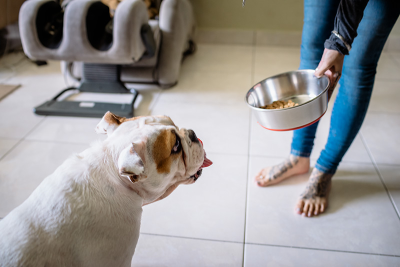

In [8]:
#@markdown ###Path to your dataset :
data_source = "" #@param {type:"string"}

#@markdown ### Path for saving the results :
results_path = "" #@param {type:"string"}


## **5. Automatic mask generation options**

#@markdown <div style="line-height: 1;"> </div>

#@markdown ###Mask generation type:
Tunable = False #@param {type:"boolean"}

#@markdown ####Adjusting tunable parameters, please input:
model = 'sam'  #@param ['sam']
points_per_side = 32  #@param {type:"number"}
pred_iou_thresh = 0.86  #@param {type:"number"}
stability_score_thresh = 0.92  #@param {type:"number"}
crop_n_layers = 1  #@param {type:"number"}
crop_n_points_downscale_factor = 2  #@param {type:"number"}
min_mask_region_area = 100  #@param {type:"number"}


# Check if data_source is empty
if not data_source:
    # Sample test image
    sample_images = f"{HOME}/sample_images" # assign the directory to hold the sample image
    print("Proceeding with pre-loaded sample image located at {}\n" .format(sample_images))
    os.makedirs(sample_images, exist_ok=True)  # create the directory to hold the sample image

    # Download the sample test image to the created directory
    !wget -q -P {sample_images} https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
    sample_dog_image = cv2.imread(os.path.join(sample_images, 'dog.jpg'))
    sample_image = sample_dog_image

    # For faster visualization purposes only

    # Get the original image shape
    height, width, channels = sample_image.shape

    # Reduce the dimensions to half
    new_height = height // 2
    new_width = width // 2

    # Resize the image to the new dimensions
    resized_image = cv2.resize(sample_image, (new_width, new_height))

    cv2_imshow(resized_image)
else:
    # Process your dataset using the specified data_source
    user_image = cv2.imread(data_source)
    sample_image = user_image
    
    # For faster visualization purposes only
    # Get the original image shape
    height, width, channels = sample_image.shape

    # Reduce the dimensions to half
    new_height = height // 2
    new_width = width // 2

    # Resize the image to the new dimensions
    resized_image = cv2.resize(sample_image, (new_width, new_height))

    cv2_imshow(resized_image)
    print("Proceeding with your dataset located at {}" .format(data_source))


# **5. Automatic Mask Generation**
---
<font size = 4> To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.


Total number of segmented items is : 71


dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])



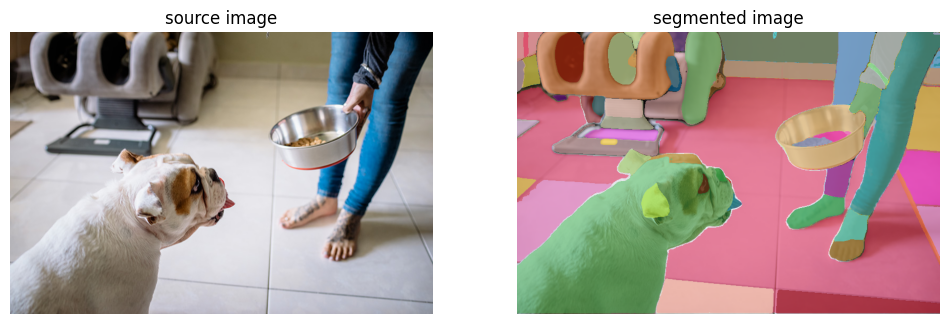

In [9]:
# @markdown ###5.1. Press play to initiate Mask Generation and visualize result.

if Tunable :
  mask_generator = SamAutomaticMaskGenerator(
      model=sam,
      points_per_side=points_per_side,
      pred_iou_thresh=pred_iou_thresh,
      stability_score_thresh=stability_score_thresh,
      crop_n_layers=crop_n_layers,
      crop_n_points_downscale_factor=crop_n_points_downscale_factor,
      min_mask_region_area=min_mask_region_area,  # Requires open-cv to run post-processing
  )
else:
  mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(sample_image) # To generate masks, just run generate on an image.

print("============================================================================================")
print(f"\nTotal number of segmented items is : {len(masks)}\n")
print("============================================================================================\n")
print(masks[0].keys())
print("============================================================================================\n")

# Create an empty DataFrame
collect_dictionary_data = []

# Iterate over the masks list
for mask in masks:
    # Create a dictionary to store the values
    row = {}
    for key, value in mask.items():
        # Exclude the 'segmentation' key
        if key != 'segmentation':
            row[key] = value
    
    # Append the row to the DataFrame
    collect_dictionary_data.append(row)

collect_dictionary_data_pd = pd.DataFrame(collect_dictionary_data)

# =============================================== visualize results ===============================================

# using Supervision we visualize our results and gt image
mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(sam_result=masks)
annotated_image = mask_annotator.annotate(scene=sample_image.copy(), detections=detections)

sv.plot_images_grid(
    images=[sample_image, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

## Another option to visualize results, comment above and uncomment below to use it.
# def show_anns(anns):
#     if len(anns) == 0:
#         return
#     sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
#     ax = plt.gca()
#     ax.set_autoscale_on(False)

#     img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
#     img[:,:,3] = 0
#     for ann in sorted_anns:
#         m = ann['segmentation']
#         color_mask = np.concatenate([np.random.random(3), [0.35]])
#         img[m] = color_mask
#     ax.imshow(img)

# plt.figure(figsize=(10,10))
# plt.imshow(sample_image)
# show_anns(masks)
# plt.axis('off')
# plt.show() 

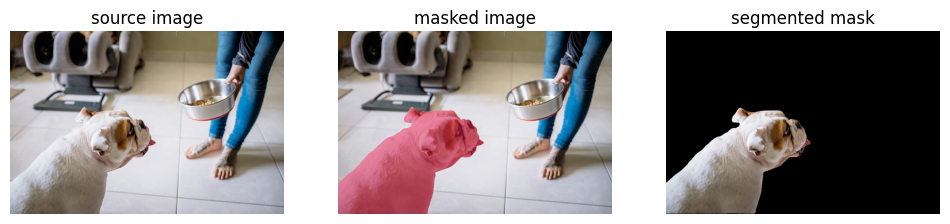

In [10]:
# @markdown ##**5.2. Interact with your segmentation results.**


# @markdown ### In order to interact with individual segmentation results, eneter any number between 0 (also 0) and the **Total number of segmented items** obtained eralier.

which_mask =  0 #@param {type:"number"}

if which_mask is None:
  which_mask = 0

# using Supervision we visualize our results and gt image
which_mask_collected = []
which_mask_collected.append(masks[which_mask])

mask_annotator_2 = sv.MaskAnnotator()
detections_2 = sv.Detections.from_sam(sam_result=which_mask_collected)
annotated_image_2 = mask_annotator_2.annotate(scene=sample_image.copy(), detections=detections_2)

# accessing the segmentation element of our dictionary containing data about the mask
segmentated_image_array = which_mask_collected[0]['segmentation']

#Convert types - boolean to uint8
result_segmented_array = np.uint8(segmentated_image_array)

#Apply mask to original picture
segmented_region = cv2.bitwise_and(sample_image,sample_image,mask = result_segmented_array)

sv.plot_images_grid(
    images=[sample_image, annotated_image_2, segmented_region],
    grid_size=(1, 3),
    titles=['source image', 'masked image', 'segmented mask']
)

##**5.3.  Visualize detailed information about each mask in a table.**



In [11]:
# @markdown ###This section we can visualize the mask data in a table structure and save them for future purposes. 

# @markdown We can produce a list over records for masks where each record is a dictionary containing the following keys:
# @markdown * `segmentation` : The mask.
# @markdown * `area` : The area of the mask in pixels.
# @markdown * `bbox` : The box around the mask, in XYWH format.
# @markdown * `predicted_iou` : The model's own prediction of the mask quality.
# @markdown * `point_coords` : The point coordinates input to the model to generate the mask.
# @markdown * `stability_score` : An additional measure of mask's  quality.
# @markdown * `crop_box` : The crop of the image used to generate this mask in XYWH format.<br><br>

# @markdown ######**Also good to know:**

# @markdown * Segmentation returns a dictionary where each mask is saved in COCO RLE format.
# @markdown  * COCO (Common Objects in Context).
# @markdown  * RLE (Run-Length Encoding).

# @markdown * The XYWH returns a list of floats [x, y, w, h] where items are:
# @markdown  * `X & Y` : Distance of the point from the origin or along the horizontal x- and y-axis .
# @markdown  * `W & H` : Width and Height of the mask.<br><br>

# @markdown ###5.3. Would you like to save this table?
Save_table = True #@param {type:"boolean"}

if Save_table:
  the_masks = [] # an empty list to collect the masks arrays
  masks_dict = [] # an empty list to collect the dictionary dictionary containing various data about the mask.

  for i in range(len(masks)):

    # only for storing purposes (saving the integrity of everything)
    each_mask = masks[i]
    masks_dict.append(each_mask)

    # only for visualization purposes of segmented elements
    individual_segmented_mask = masks[i]['segmentation']
    the_masks.append(individual_segmented_mask)

  # directory address to save the segmented masks 
  segmented_masks_dir = f"{HOME}/Mask generation results"
  
  if os.path.exists(segmented_masks_dir):
    shutil.rmtree(segmented_masks_dir)
    print(f"{color.WARNING}A similar directory under ** {segmented_masks_dir} ** existed and removed!{color.END}")
    os.makedirs(segmented_masks_dir, exist_ok=True)
    print("=====================================================================================")
  else:
    os.makedirs(segmented_masks_dir, exist_ok=True)


  # Save the array as .npy file
  np.save(os.path.join(segmented_masks_dir, 'masks_dict.npy'), masks_dict)
  print(f"{color.GREEN}The resulting table is saved at {segmented_masks_dir} .{color.END}")
  print("=====================================================================================\n")

else:
  print(f"{color.WARNING}The resulting table will not be saved!{color.END}")

# @markdown ###<br>5.3. Would you like to display this table? 
Plot_table = False #@param {type:"boolean"}
if Plot_table:
  display(collect_dictionary_data_pd) # Display the DataFrame


The resulting table is saved at /content/Mask generation results .



# **6. Visualize and Save resulting images**
---
<font size = 4> 

In [12]:
# @markdown ##6.1. Press play to save your resulting images.<br>
# @markdown --- 
# @markdown <br>

# @markdown ###Which of the following would you like to save? 
Images_of_Segmented_Items = True #@param {type:"boolean"}
Images_of_Overlay_Masks = True #@param {type:"boolean"}
Images_of_Generated_Masks = True #@param {type:"boolean"}

# Determine the saving types based on user input
saving_var = []
if Images_of_Segmented_Items:
  saving_var.append('Segmented elements')
if Images_of_Overlay_Masks:
  saving_var.append('Annotated images')
if Images_of_Generated_Masks:
  saving_var.append('Masks')

# Check if at least one saving type is selected
if len(saving_var) > 0:
  for save_type in saving_var:
    save_images(save_type)
else:
  print("No Images will be saved!")

# ==============================================================================

all_segmented_regions_collected_array = []
all_annotated_regions_collected_array = []
result_segmented_array_BW = []

for i in range(len(masks)):
  # using Supervision we visualize our results and gt image
  which_mask_collected = []
  which_mask_collected.append(masks[i])

  mask_annotator_2 = sv.MaskAnnotator()
  detections_2 = sv.Detections.from_sam(sam_result=which_mask_collected)
  annotated_image_2 = mask_annotator_2.annotate(scene=sample_image.copy(), detections=detections_2)

  # accessing the segmentation element of our dictionary containing data about the mask
  segmentated_image_array = which_mask_collected[0]['segmentation']

  # Convert types - boolean to uint8 (given the fact that the masks list is an array of boolean, we need to convert it to pixel based values)
  result_segmented_array = np.uint8(segmentated_image_array)

  # now that we have done the conversion we should have a list of arrays where values are either 0 or 1. 
  # knowing that a mask is a black and white image, if we want to display it, the resulting image will be basically all blacked out!
  # that is because, while 0 is pitch black, 1 is also one pixel brighter than 0 and not recongziable by our eyes.
  # to overcome this, we need to think of the initial mask array (True or False) as (White and Black) or in otherwords (255 and 0)
  # knowing that we can convert the arrays with value 1 to 255. 
  result_segmented_array = result_segmented_array * 255 #now we have an array of 0 and 255 representing black and white pixels

  #Apply mask to original picture
  segmented_region = cv2.bitwise_and(sample_image,sample_image,mask = result_segmented_array)
  
  all_segmented_regions_collected_array.append(segmented_region)
  all_annotated_regions_collected_array.append(annotated_image_2)
  result_segmented_array_BW.append(result_segmented_array)

  if Images_of_Segmented_Items:
    # Saving segmented images to colab's drive
    cv2.imwrite(f'/content/Segmented elements/{i}.jpg', segmented_region)

  if Images_of_Overlay_Masks:
    # Saving annotated images to colab's drive
    cv2.imwrite(f'/content/Annotated images/{i}.jpg', annotated_image_2)

  if Images_of_Generated_Masks:
    # Saving masks images to colab's drive
    cv2.imwrite(f'/content/Masks/{i}.jpg', result_segmented_array)


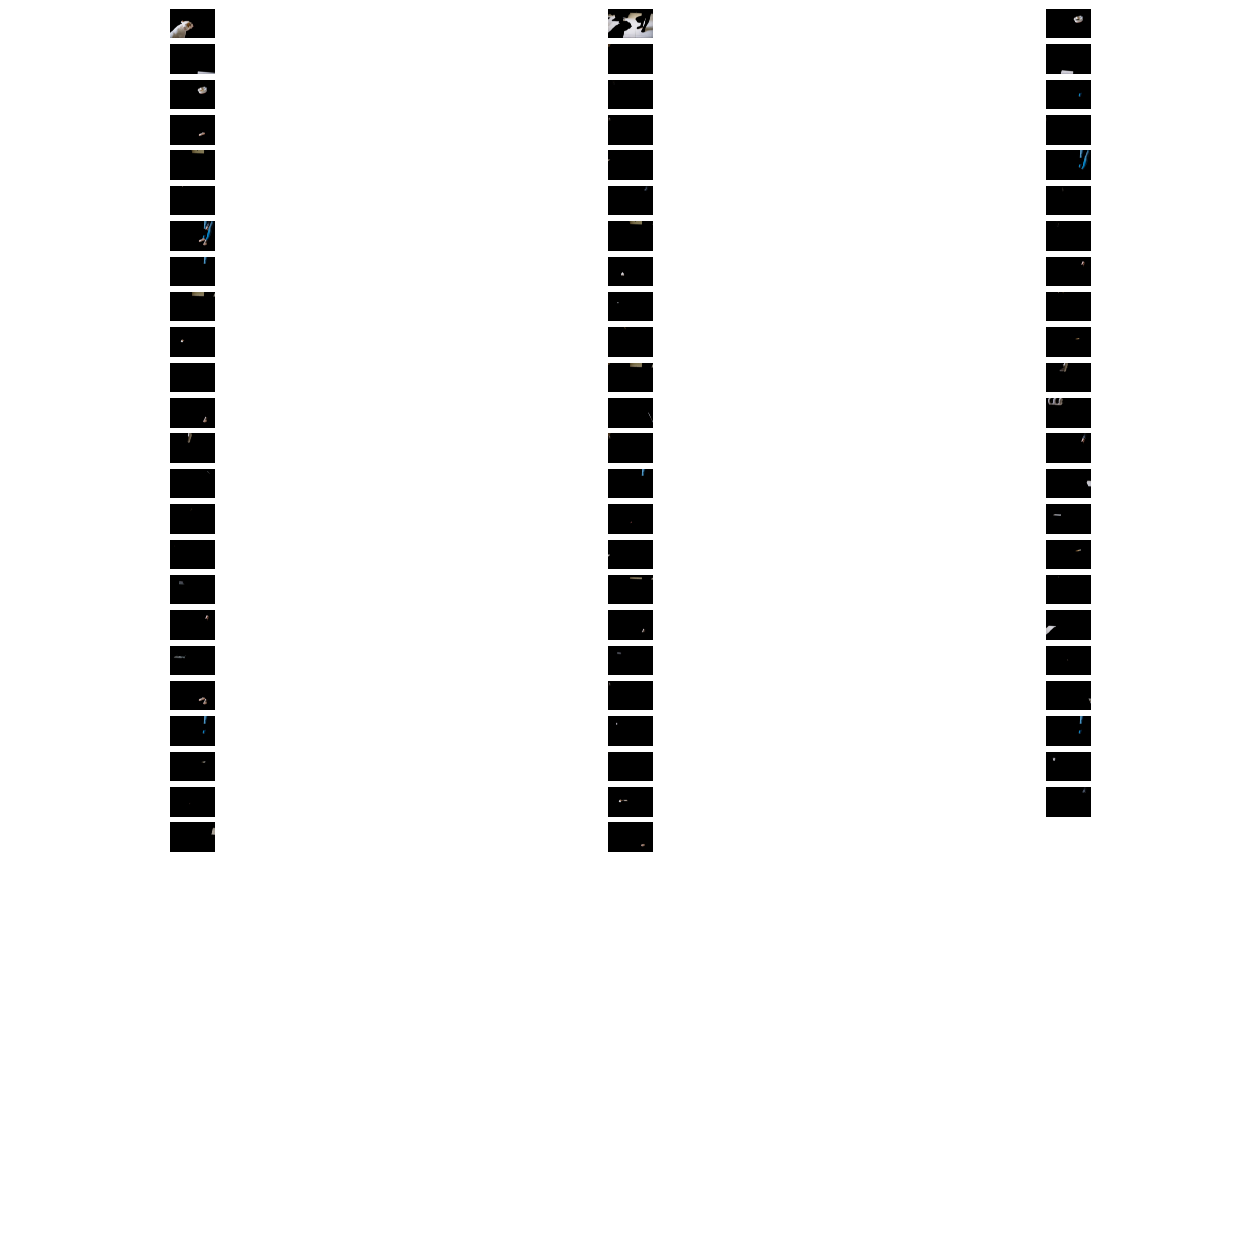

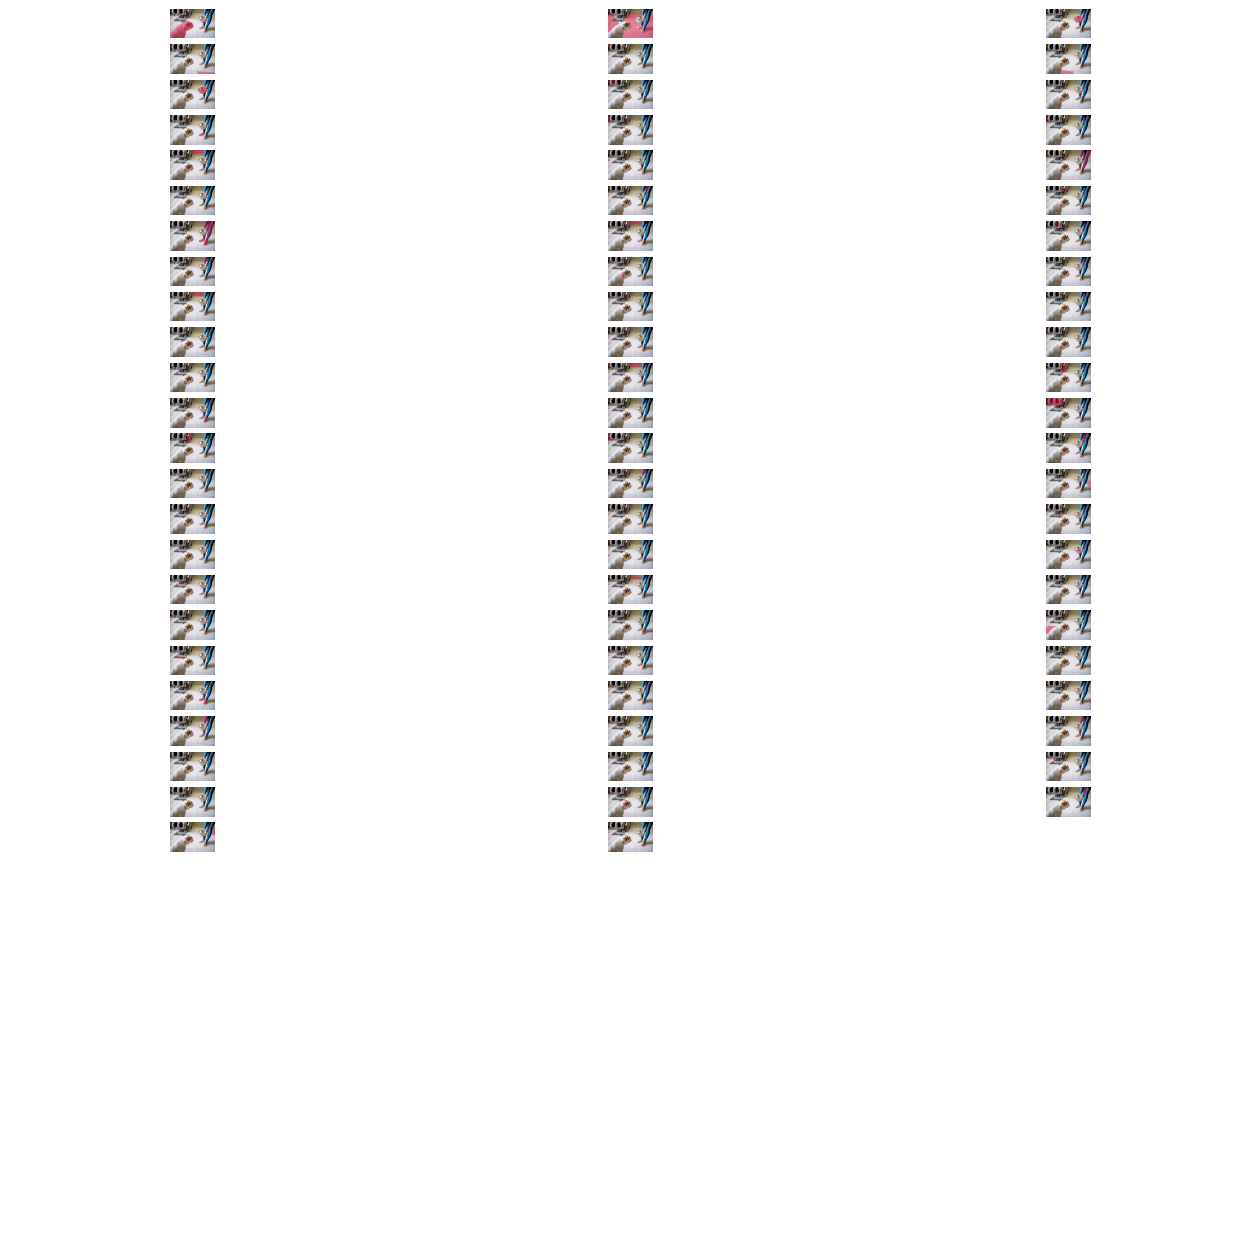

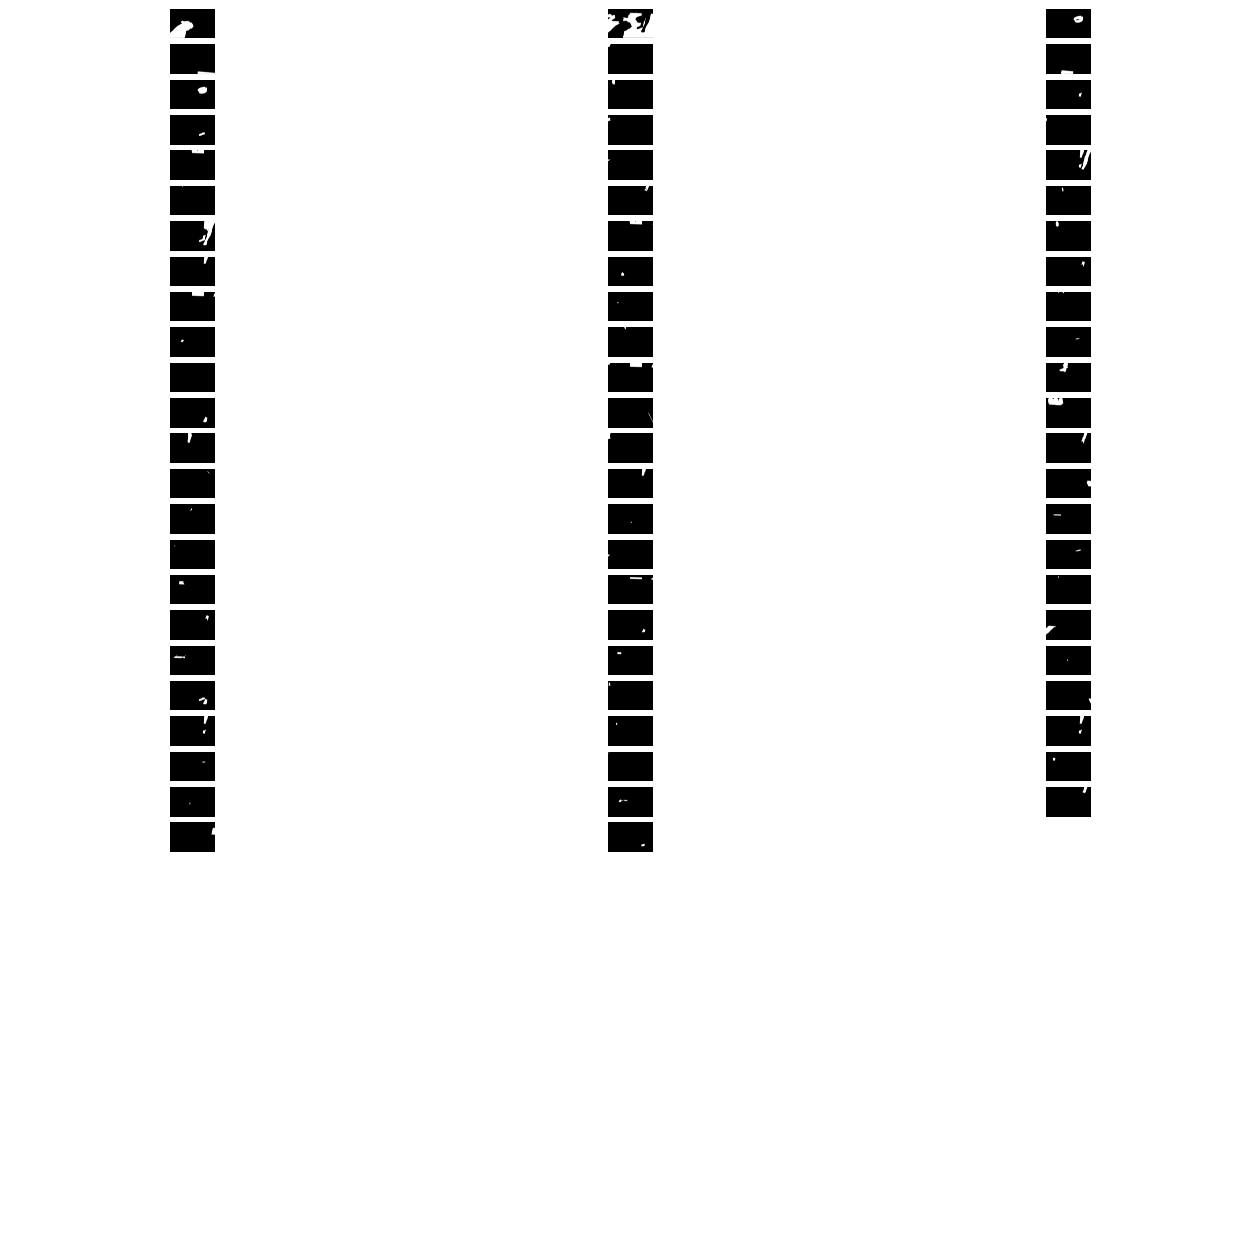

In [13]:
# @markdown ##6.2. Press play to visualize.<br>
# @markdown --- 
# @markdown <br>

#@markdown ###In order to visualize the resulting segmentations and masks, select at least one of the visualization types given below and proceed.<br><br>

Segmented_Items = True #@param {type:"boolean"}

Overlay_Masks = True #@param {type:"boolean"}

Generated_Masks = True #@param {type:"boolean"}


# Determine the visualization types based on user input
visualization_types = []
if Segmented_Items:
  visualization_types.append(all_segmented_regions_collected_array)
if Overlay_Masks:
  visualization_types.append(all_annotated_regions_collected_array)
if Generated_Masks:
  visualization_types.append(result_segmented_array_BW)

# Check if at least one visualization type is selected
if len(visualization_types) > 0:
  for vis_type in visualization_types:
    visualize_results(masks, vis_type)
else:
  print("Please select a visualization type and try again.")


# **7. Do transparent background.**
---
<font size = 4> 



A similar directory under ** /content/Trasnparent background ** existed and removed!

Segmented elements with trasnparent background are successfully saved under the directory ** /content/Trasnparent background **



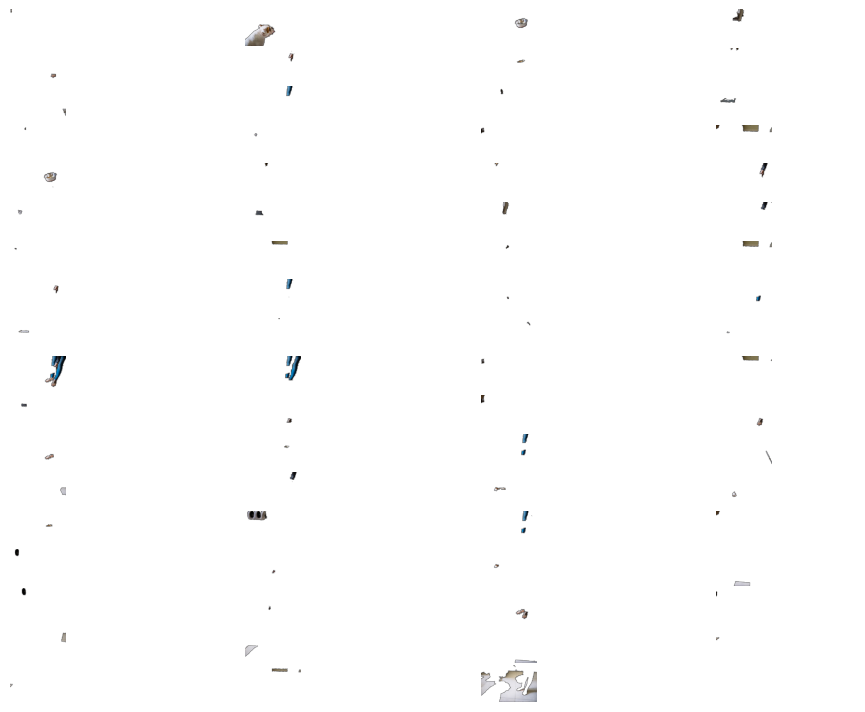

In [15]:
#@markdown ###7.1. Do you wish to obtain your segmented images with a trasnparent background ? <br>

Save_segmented_images_with_transparent_background = True #@param {type:"boolean"}
directory_path_Trasnparent_background = f'{HOME}/Trasnparent background'

# @markdown  Control the intensity of thresholding: 
Thresh_value = 0 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ##### Threshold value that is used for classifying pixel intensities. Adjusting this parameter allows you to segment images based on the desired criteria, such as extracting objects or regions with specific intensity characteristics.
# @markdown <br>***Tip: This feature only works if you have already saved your segmented images in <u> section 6.1. </u>***


if Save_segmented_images_with_transparent_background:
  if Images_of_Segmented_Items :
    source_path = f'{HOME}/Segmented elements'
    trasnparent_background(Thresh_value, source_path)
    print(f"{color.GREEN}Segmented elements with trasnparent background are successfully saved under the directory ** {directory_path_Trasnparent_background} **\n{color.END}")
  else:
    print(f"{color.WARNING}You have not saved your segmentation results from section 6.1. \nPlease go back to section 6.1. and check mark the 'Images_of_Segmented_Items: ✅'\nThen return to this section and reinitiate! {color.END}")

# @markdown ---
# @markdown <br> **Would you like to have them visualized?**
Visualize_segmented_images_with_transparent_background = True #@param {type:"boolean"}

if Visualize_segmented_images_with_transparent_background:
  display_images_in_directory(directory_path_Trasnparent_background)


# **8. load and display previously segmented masks.**
---
<font size = 4> 



Proceeding with pre-loaded sample image located at /content/sample_images



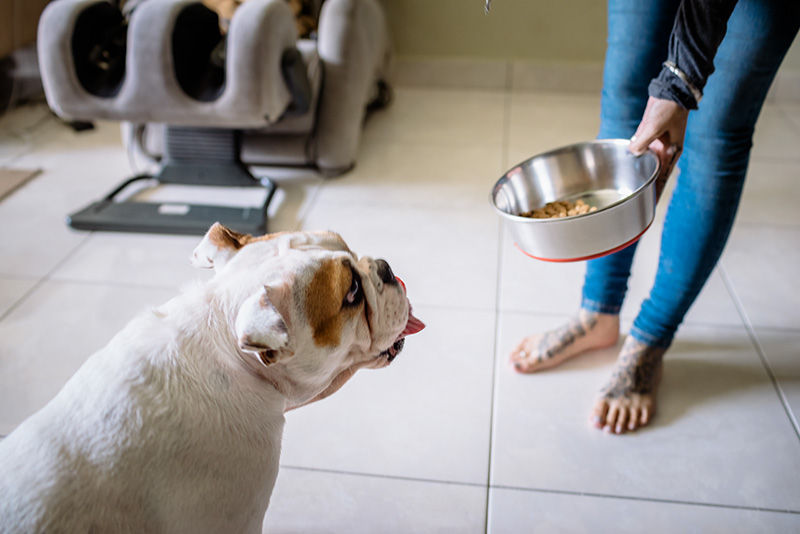



Total number of segmented items is : 71




In [16]:
#@markdown ### 8.1. Path to your image :
data_source = "" #@param {type:"string"}

model = 'sam' 

# Check if data_source is empty
if not data_source:
    # Sample test image
    sample_images = f"{HOME}/sample_images" # assign the directory to hold the sample image
    print("Proceeding with pre-loaded sample image located at {}\n" .format(sample_images))
    os.makedirs(sample_images, exist_ok=True)  # create the directory to hold the sample image

    # Download the sample test image to the created directory
    !wget -q -P {sample_images} https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
    
    sample_dog_image = cv2.imread(os.path.join(sample_images, 'dog.jpg'))

    sample_image = sample_dog_image

    # Specify the desired smaller dimensions
    # target_width, target_height = 560, 370

    # Resize the image to the specified dimensions
    # sample_image = cv2.resize(sample_image, (target_width, target_height))

    cv2_imshow(sample_image)
else:
    # Process your dataset using the specified data_source
    user_image = cv2.imread(data_source)
    sample_image = user_image
    
    # For faster visualization purposes only
    # Get the original image shape
    height, width, channels = sample_image.shape

    # Reduce the dimensions to half
    new_height = height // 3
    new_width = width // 3

    # Resize the image to the new dimensions
    resized_image = cv2.resize(sample_image, (new_width, new_height))

    cv2_imshow(resized_image)
    print("Proceeding with your dataset located at {}" .format(data_source))



# @markdown ###<br> load previously saved table (results) from **section 5.3**.

path_to_automatic_segmentation_results = '/content/gdrive/MyDrive/SAM - RESULTS/Mask generation results/masks_dict.npy'#@param {type:"string"}

if not path_to_automatic_segmentation_results :
  
  # create an empty list to grab and store all the arrays from the pre-defined .npy file
  segmentation_aka_the_mask_elements = []
  
  # loading from the pre-defined .npy file
  loaded_automatic_segmentation_results = np.load(os.path.join(segmented_masks_dir, 'masks_dict.npy'), allow_pickle=True)
  
  # iterate through each dictionary object and only grab 'segmentation' array data - for visualization purposes
  for i in range(len(loaded_automatic_segmentation_results)):
    individual_segmented_mask_elements = loaded_automatic_segmentation_results[i]['segmentation']
    segmentation_aka_the_mask_elements.append(individual_segmented_mask_elements)

  loaded_masks = segmentation_aka_the_mask_elements

else:
  # create an empty list to grab and store all the arrays in the loaded .npy file
  segmentation_aka_the_mask_elements = []

  # Load the segmentation results from .npy file obtained by user
  loaded_automatic_segmentation_results = np.load(path_to_automatic_segmentation_results, allow_pickle=True)

  # iterate through each dictionary object and only grab 'segmentation' array data - for visualization purposes
  for i in range(len(loaded_automatic_segmentation_results)):
    individual_segmented_mask_elements = loaded_automatic_segmentation_results[i]['segmentation']
    segmentation_aka_the_mask_elements.append(individual_segmented_mask_elements)

  loaded_masks = segmentation_aka_the_mask_elements

print("\n============================================================================================")
print(f"\nTotal number of segmented items is : {len(loaded_masks)}\n")
print("============================================================================================\n")


Segmented elements are successfully saved under the directory ** /content/Segmented elements from preloaded **

Annotated segmentations are successfully saved under the directory ** /content/annotated images from preloaded **



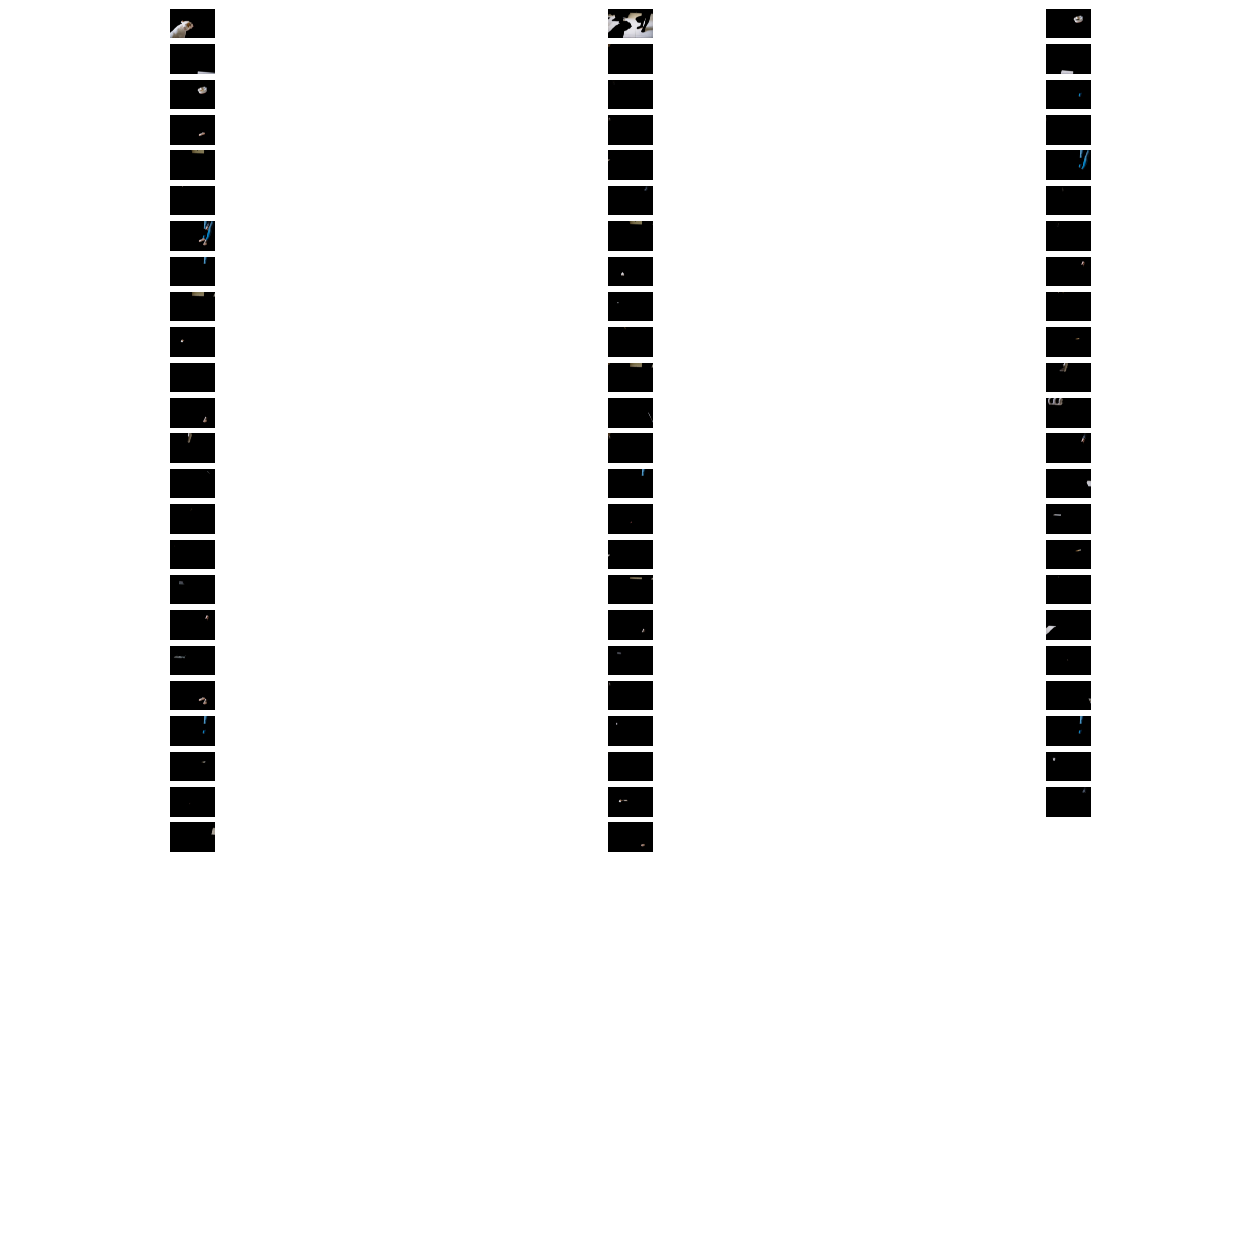

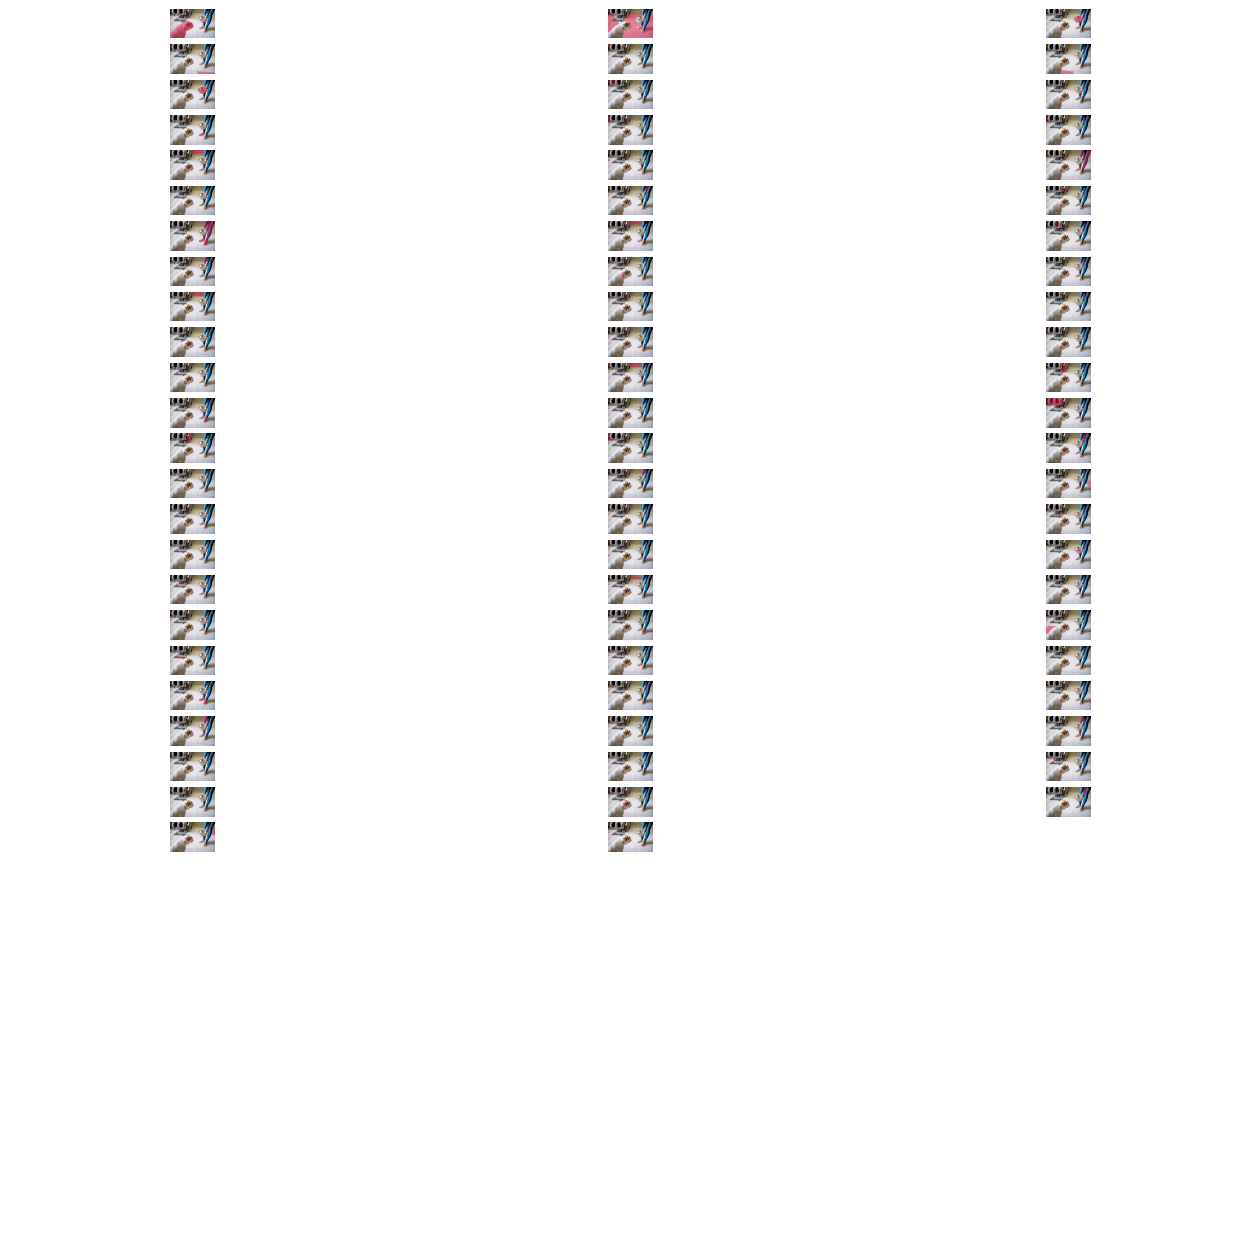

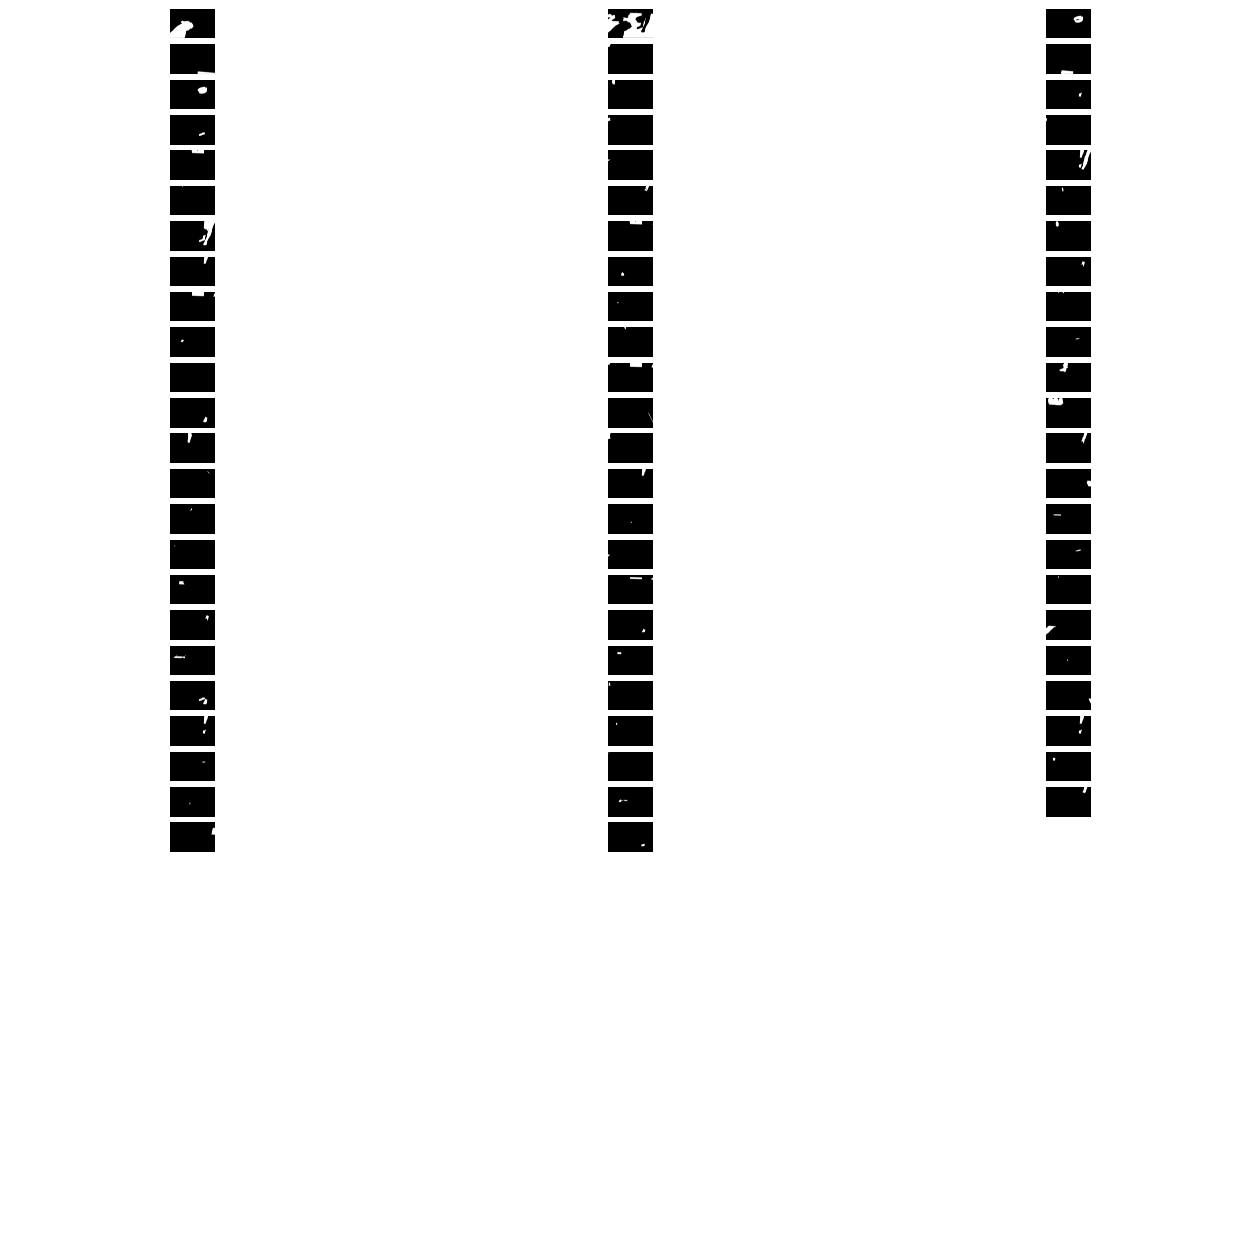

In [17]:
# @markdown ##8.2. Apply your masks onto your images and visualize results.<br>
# @markdown --- 
# @markdown <br>

all_segmented_regions_collected_array_preloaded = []
all_annotated_regions_collected_array_preloaded = []

# directory address to save the segmented images
segmented_elements_dir_preloaded = f"{HOME}/Segmented elements from preloaded"
if os.path.exists(segmented_elements_dir_preloaded):
  shutil.rmtree(segmented_elements_dir_preloaded)
  print(f"{color.WARNING}Similar directory under ** {segmented_elements_dir_preloaded} ** existed and removed!\n{color.END}")
  os.makedirs(segmented_elements_dir_preloaded, exist_ok=True)
else:
  os.makedirs(segmented_elements_dir_preloaded, exist_ok=True)
  print(f"{color.GREEN}Segmented elements are successfully saved under the directory ** {segmented_elements_dir_preloaded} **\n{color.END}")

# directory address to save the annotated images
annotated_images_dir_preloaded = f"{HOME}/annotated images from preloaded"
if os.path.exists(annotated_images_dir_preloaded):
  shutil.rmtree(annotated_images_dir_preloaded)
  print(f"{color.WARNING}Similar directory under ** {annotated_images_dir_preloaded} ** existed and removed!\n{color.END}")
  os.makedirs(annotated_images_dir_preloaded, exist_ok=True)
else:
  os.makedirs(annotated_images_dir_preloaded, exist_ok=True)
  print(f"{color.GREEN}Annotated segmentations are successfully saved under the directory ** {annotated_images_dir_preloaded} **\n{color.END}")


for i in range(len(loaded_automatic_segmentation_results)):
  # using Supervision we visualize our results and gt image
  which_preloaded_mask = i
  which_preloaded_mask_collected = []
  which_preloaded_mask_collected.append(loaded_automatic_segmentation_results[which_preloaded_mask])

  mask_annotator_2_preloaded = sv.MaskAnnotator()
  detections_2_preloaded = sv.Detections.from_sam(sam_result=which_preloaded_mask_collected)
  annotated_image_2_preloaded = mask_annotator_2_preloaded.annotate(scene=sample_image.copy(), detections=detections_2_preloaded)

  # accessing the segmentation element of our dictionary containing data about the mask
  segmentated_image_array_preloaded = which_preloaded_mask_collected[0]['segmentation']
  # Convert types - boolean to uint8
  result_segmented_array_preloaded = np.uint8(segmentated_image_array_preloaded)
  # Apply mask to original picture
  segmented_region_preloaded = cv2.bitwise_and(sample_image,sample_image,mask = result_segmented_array_preloaded)
  
  all_segmented_regions_collected_array_preloaded.append(segmented_region_preloaded)
  all_annotated_regions_collected_array_preloaded.append(annotated_image_2_preloaded)

  # Saving segmented images to colab's drive
  cv2.imwrite(f'/content/Segmented elements from preloaded/{i}.jpg', segmented_region_preloaded)

  # Saving annotated images to colab's drive
  cv2.imwrite(f'/content/annotated images from preloaded/{i}.jpg', annotated_image_2_preloaded)


# =================================================================================================


#@markdown ###In order to visualize the resulting segmentations and masks, select at least one of the visualization types given below and proceed.<br><br>

Segmented_Items = True #@param {type:"boolean"}

Overlay_Masks = True #@param {type:"boolean"}

Generated_Masks = True #@param {type:"boolean"}


# Determine the visualization types based on user input
visualization_types = []
if Segmented_Items:
  visualization_types.append(all_segmented_regions_collected_array_preloaded)
if Overlay_Masks:
  visualization_types.append(all_annotated_regions_collected_array_preloaded)
if Generated_Masks:
  visualization_types.append(loaded_masks)

# Check if at least one visualization type is selected
if len(visualization_types) > 0:
  for vis_type in visualization_types:
    visualize_results(loaded_masks, vis_type)
else:
  print("Please select a visualization type and try again.")


In [18]:
# @markdown **🚧🚧🚧Still in progress🚧🚧🚧**

# @markdown #📝Note to self: add other directories or the option to interact with the results - clickable UI - extend it to previous steps as well - load it a as a function in section 2.2 then call it when needed.
# Define the directory containing the images
image_directory = '/content/annotated images from preloaded'

# Get a list of image files in the directory
image_files = [file for file in os.listdir(image_directory) if file.endswith(('.jpg', '.png'))]

# Create a list to store the current image index
current_index = 0

# Create the display function
def display_image():
    # Clear the output area
    with out:
        clear_output(wait=True)
        # Create the Image widget for the current image
        image_path = os.path.join(image_directory, image_files[current_index])
        img = Image(filename=image_path)
        # Display the Image widget
        display(img)

# Create the output widget for displaying the image
out = Output()

# Display the initial image
display_image()

# Create the buttons
prev_button = Button(description='Previous')
next_button = Button(description='Next')

# Define the button click handlers
def on_prev_button_clicked(b):
    global current_index
    if current_index > 0:
        current_index -= 1
        display_image()

def on_next_button_clicked(b):
    global current_index
    if current_index < len(image_files) - 1:
        current_index += 1
        display_image()

# Assign the button click handlers
prev_button.on_click(on_prev_button_clicked)
next_button.on_click(on_next_button_clicked)

# Display the buttons and image output
display(VBox([HBox([prev_button, next_button]), out]))


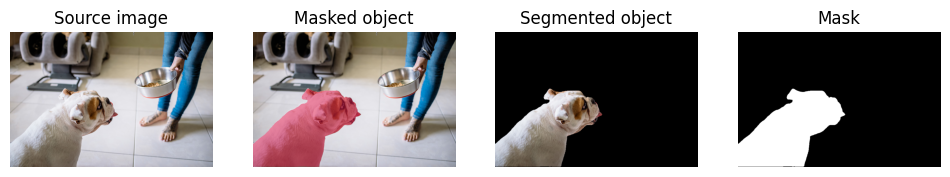

In [ ]:
# @markdown ##**8.3. Interact with your results.**


# @markdown ### In order to interact with individual segmentation results, eneter any number between 0 (also 0) and the **Total number of segmented items** obtained eralier.

which_mask =  0 #@param {type:"number"}

if which_mask is None:
  which_mask = 0

# using Supervision we visualize our results and gt image
which_mask_collected = []
which_mask_collected.append(loaded_automatic_segmentation_results[which_mask])

mask_annotator_2 = sv.MaskAnnotator()
detections_2 = sv.Detections.from_sam(sam_result=which_mask_collected)
annotated_image_2 = mask_annotator_2.annotate(scene=sample_image.copy(), detections=detections_2)

# accessing the segmentation element of our dictionary containing data about the mask
segmentated_image_array = which_mask_collected[0]['segmentation']
#Convert types - boolean to uint8
result_segmented_array = np.uint8(segmentated_image_array)
#Apply mask to original picture
segmented_region = cv2.bitwise_and(sample_image,sample_image,mask = result_segmented_array)

sv.plot_images_grid(
    images=[sample_image, annotated_image_2, segmented_region, result_segmented_array],
    grid_size=(1, 4),
    titles=['Source image', 'Masked object', 'Segmented object', 'Mask']
)

# **8. Export results to your Google Drive.**
---
<font size = 4> 



In [ ]:
import shutil

source_directory = '/content/Annotated images'
destination_directory = '/content/gdrive/MyDrive/SAM - RESULTS/Annotated images'

shutil.copytree(source_directory, destination_directory)


In [ ]:
source_directory = '/content/Segmented elements'
destination_directory = '/content/gdrive/MyDrive/SAM - RESULTS/Segmented elements'

shutil.copytree(source_directory, destination_directory)


In [ ]:
source_directory = '/content/Masks'
destination_directory = '/content/gdrive/MyDrive/SAM - RESULTS/Masks'

shutil.copytree(source_directory, destination_directory)


In [ ]:
source_directory = '/content/Mask generation results'
destination_directory = '/content/gdrive/MyDrive/SAM - RESULTS/Mask generation results'

shutil.copytree(source_directory, destination_directory)
